# Chronic Kidney Disease Prediction

In [ ]:
import sklearn
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report ,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
import re

df = pd.read_csv('chronic_kidney_disease.csv')
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# #df=df.replace('[^\d.]','',regex=True).astypey(float)
# v= lambda x:float(x[1:-1])
# df.htn=df.htn.apply(v)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    float64
 6   pc      335 non-null    float64
 7   pcc     396 non-null    float64
 8   ba      396 non-null    float64
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    float64
 19  dm      398 non-null    float64
 20  cad     398 non-null    float64
 21  appet   399 non-null    float64
 22  pe

In [4]:
print(df.shape)

(400, 25)


In [5]:
df.mean()


age        51.483376
bp         76.469072
sg          1.017408
al          1.016949
su          0.450142
rbc         0.810484
pc          0.773134
pcc         0.106061
ba          0.055556
bgr       148.036517
bu         57.425722
sc          3.072454
sod       137.528754
pot         4.627244
hemo       12.526437
pcv        38.884498
wbcc     8406.122449
rbcc        4.707435
htn         0.369347
dm          0.344221
cad         0.085427
appet       0.794486
pe          0.190476
ane         0.150376
class       0.625000
dtype: float64

In [6]:
df.min()

age         2.000
bp         50.000
sg          1.005
al          0.000
su          0.000
rbc         0.000
pc          0.000
pcc         0.000
ba          0.000
bgr        22.000
bu          1.500
sc          0.400
sod         4.500
pot         2.500
hemo        3.100
pcv         9.000
wbcc     2200.000
rbcc        2.100
htn         0.000
dm          0.000
cad         0.000
appet       0.000
pe          0.000
ane         0.000
class       0.000
dtype: float64

In [7]:
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [8]:
df.isin(['	?']).sum() #data which includes the '?' sign

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [9]:
df.isin(['	?']).sum() #data which includes the '?' sign

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bp'}>,
        <AxesSubplot:title={'center':'sg'}>,
        <AxesSubplot:title={'center':'al'}>,
        <AxesSubplot:title={'center':'su'}>],
       [<AxesSubplot:title={'center':'rbc'}>,
        <AxesSubplot:title={'center':'pc'}>,
        <AxesSubplot:title={'center':'pcc'}>,
        <AxesSubplot:title={'center':'ba'}>,
        <AxesSubplot:title={'center':'bgr'}>],
       [<AxesSubplot:title={'center':'bu'}>,
        <AxesSubplot:title={'center':'sc'}>,
        <AxesSubplot:title={'center':'sod'}>,
        <AxesSubplot:title={'center':'pot'}>,
        <AxesSubplot:title={'center':'hemo'}>],
       [<AxesSubplot:title={'center':'pcv'}>,
        <AxesSubplot:title={'center':'wbcc'}>,
        <AxesSubplot:title={'center':'rbcc'}>,
        <AxesSubplot:title={'center':'htn'}>,
        <AxesSubplot:title={'center':'dm'}>],
       [<AxesSubplot:title={'center':'cad'}>,
        <AxesSubplot:title={'center'

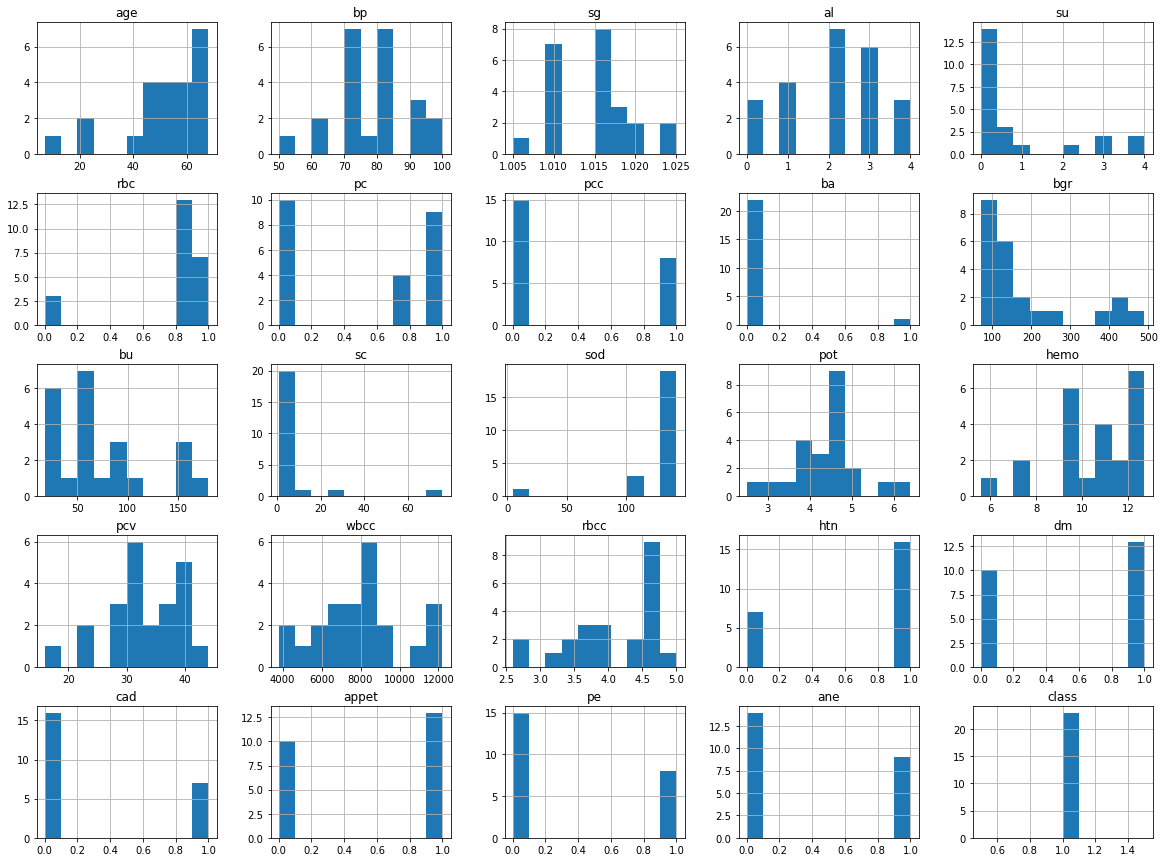

In [20]:
df.iloc[1:24].hist(xlabelsize=10,ylabelsize=10,figsize=(20,15)) #Histogram

In [12]:
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc      float64
pc       float64
pcc      float64
ba       float64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn      float64
dm       float64
cad      float64
appet    float64
pe       float64
ane      float64
class      int64
dtype: object

In [21]:
#replaing null value with mean value

columns=list(df.columns)
for col_name in columns:
     df[col_name].fillna(value=df[col_name].mean(), inplace=True)




In [22]:
#min-max scaling

def min_max_scaler(df):
    df_copy=df.copy()
    for column in df_copy.columns:
        df_copy[column]=(df_copy[column]-df_copy[column].min())/(df_copy[column].max()-df_copy[column].min())
        
    return df_copy
min_max_scaler(df)   

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0.522727,0.230769,0.75,0.2,0.0,0.810484,1.0,0.0,0.0,0.211538,...,0.777778,0.231405,0.525424,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.056818,0.000000,0.75,0.8,0.0,0.810484,1.0,0.0,0.0,0.269309,...,0.644444,0.157025,0.441938,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.681818,0.230769,0.25,0.4,0.6,1.000000,1.0,0.0,0.0,0.856838,...,0.488889,0.219008,0.441938,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.522727,0.153846,0.00,0.8,0.0,1.000000,0.0,1.0,0.0,0.202991,...,0.511111,0.185950,0.305085,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.556818,0.230769,0.25,0.4,0.0,1.000000,1.0,0.0,0.0,0.179487,...,0.577778,0.210744,0.423729,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.602273,0.230769,0.75,0.0,0.0,1.000000,1.0,0.0,0.0,0.252137,...,0.844444,0.185950,0.474576,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,0.454545,0.153846,1.00,0.0,0.0,1.000000,1.0,0.0,0.0,0.113248,...,1.000000,0.231405,0.694915,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,0.113636,0.230769,0.75,0.0,0.0,1.000000,1.0,0.0,0.0,0.166667,...,0.888889,0.181818,0.559322,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,0.170455,0.076923,1.00,0.0,0.0,1.000000,1.0,0.0,0.0,0.196581,...,0.933333,0.206612,0.644068,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [26]:
from sklearn.model_selection import train_test_split

y = df['class']

#X = df.drop(columns = 'class')
X=df.drop(columns=['class'])
#X=df.drop(columns=['scaled_age','scaled_bp','scaled_al','scaled_su','scaled_rbc','scaled_bgr','scaled_bu','scaled_sc','scaled_sod','scaled_hemo','scaled_pcv','scaled_wbc','class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [27]:
X_train

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
3,48.0,70.0,1.005000,4.000000,0.000000,1.000000,0.000000,1.0,0.0,117.0,...,11.2,32.0,6700.000000,3.900000,1.0,0.0,0.0,0.0,1.0,1.0
18,60.0,100.0,1.025000,0.000000,3.000000,0.810484,1.000000,0.0,0.0,263.0,...,12.7,37.0,11400.000000,4.300000,1.0,1.0,1.0,1.0,0.0,0.0
202,78.0,60.0,1.017408,1.016949,0.450142,0.810484,0.773134,0.0,0.0,114.0,...,8.0,24.0,8406.122449,4.707435,0.0,1.0,0.0,1.0,0.0,1.0
250,40.0,80.0,1.025000,0.000000,0.000000,1.000000,1.000000,0.0,0.0,140.0,...,15.0,48.0,10400.000000,4.500000,0.0,0.0,0.0,1.0,0.0,0.0
274,19.0,80.0,1.020000,0.000000,0.000000,1.000000,1.000000,0.0,0.0,107.0,...,14.4,44.0,8406.122449,4.707435,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,46.0,60.0,1.010000,1.000000,0.000000,1.000000,1.000000,0.0,0.0,163.0,...,9.8,28.0,14600.000000,3.200000,1.0,1.0,0.0,1.0,0.0,0.0
106,50.0,90.0,1.017408,1.016949,0.450142,0.810484,0.773134,0.0,0.0,89.0,...,6.0,17.0,6500.000000,4.707435,1.0,1.0,0.0,1.0,1.0,1.0
270,23.0,80.0,1.025000,0.000000,0.000000,1.000000,1.000000,0.0,0.0,111.0,...,14.3,41.0,7200.000000,5.000000,0.0,0.0,0.0,1.0,0.0,0.0
348,38.0,80.0,1.020000,0.000000,0.000000,1.000000,1.000000,0.0,0.0,99.0,...,13.6,44.0,7300.000000,6.400000,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
X_train.to_csv("XTrain.csv")
X_test.to_csv('XTest.csv')

In [29]:
# x=df.drop('age','bp','sg','al','su','rbc','bgr','bu','sc','sod','hemo','pcv','wbc')

### Decision Tree Classifier

In [31]:
from sklearn import tree

dtree=tree.DecisionTreeClassifier()
dtree=dtree.fit(X_train,y_train)
ypred= dtree.score(X_test,y_test)

print(ypred)

1.0


In [33]:
pred_dtree=dtree.predict(X_test)


#### confusion matrix

In [34]:
print(confusion_matrix(y_test,pred_dtree))

[[28  0]
 [ 0 52]]


#### Classification report of Decision Tree Classifier

In [35]:
print(classification_report(y_test,pred_dtree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



[Text(706.21875, 757.1571428571428, 'X[14] <= 12.95\ngini = 0.472\nsamples = 320\nvalue = [122, 198]'),
 Text(505.6875, 640.6714285714286, 'X[17] <= 5.65\ngini = 0.063\nsamples = 184\nvalue = [6, 178]'),
 Text(313.875, 524.1857142857143, 'X[10] <= 15.5\ngini = 0.043\nsamples = 181\nvalue = [4, 177]'),
 Text(139.5, 407.7, 'X[5] <= 0.905\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(69.75, 291.21428571428567, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(209.25, 291.21428571428567, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(488.25, 407.7, 'X[15] <= 41.5\ngini = 0.022\nsamples = 176\nvalue = [2, 174]'),
 Text(348.75, 291.21428571428567, 'X[11] <= 0.95\ngini = 0.012\nsamples = 171\nvalue = [1, 170]'),
 Text(279.0, 174.7285714285714, 'X[10] <= 33.5\ngini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(209.25, 58.24285714285713, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(348.75, 58.24285714285713, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(418.5, 174.728571428

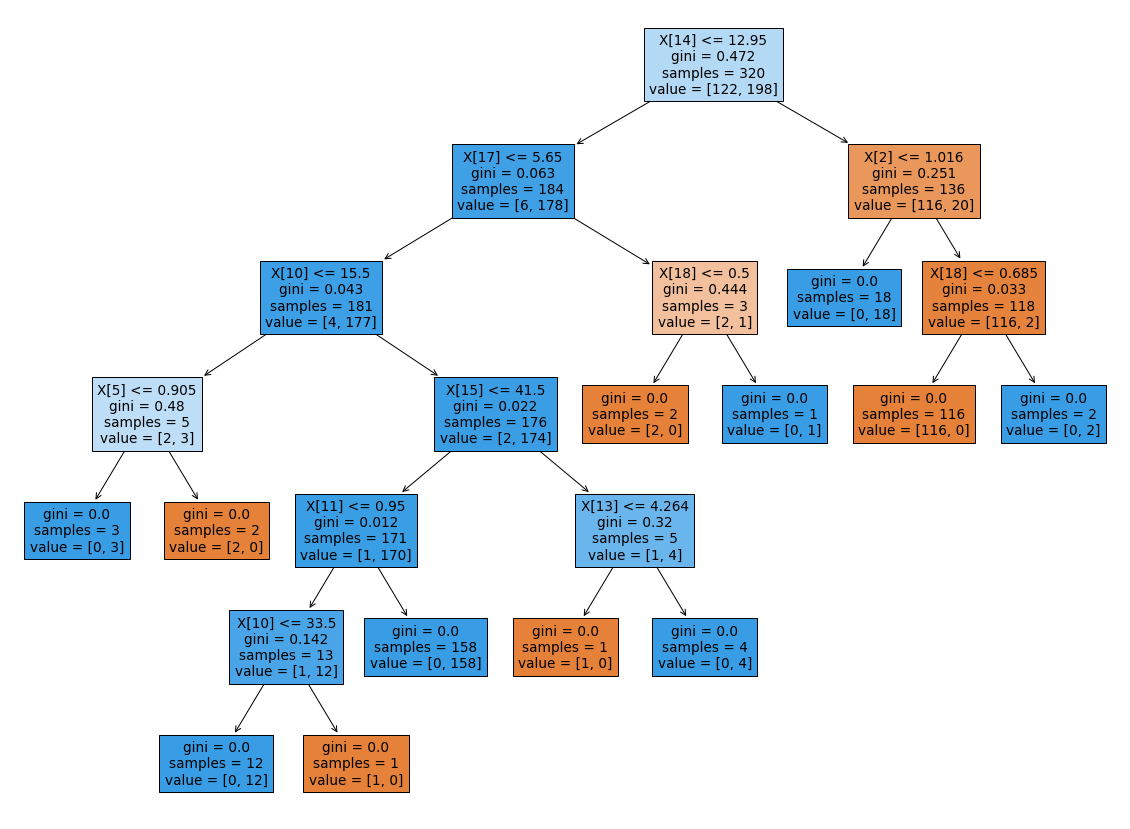

In [36]:
plt.figure(figsize=(20,15))
tree.plot_tree(dtree,filled=True)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train_scaled)
lr.score(X_test_scaled, y_test_scaled)

In [ ]:
pred_lr=lr.predict(X_test_scaled)

#### confusion matrix

In [ ]:
print(confusion_matrix(y_test_scaled,pred_lr))

#### Classification report of Logistic Regression

In [ ]:
print(classification_report(y_test_scaled,pred_lr))

### KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


KnnClassifier = KNeighborsClassifier(n_neighbors=65, metric='euclidean')
KnnClassifier.fit(X_train_scaled,y_train_scaled)
prediction=KnnClassifier.score(X_test_scaled, y_test_scaled)

In [ ]:
pred_knn=KnnClassifier.predict(X_test_scaled)

#### confusion matrix

In [ ]:
print(confusion_matrix(y_test_scaled,pred_knn))

#### Classification report of KNeighborsClassifier

In [ ]:
print(classification_report(y_test_scaled,pred_knn))

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm = SVC(probability= True)
svm.fit(X_train_scaled, y_train_scaled)
svm.score(X_test_scaled, y_test_scaled)

In [ ]:
pred_svm=svm.predict(X_test_scaled)

#### confusion matrix

In [ ]:
print(confusion_matrix(y_test_scaled,pred_svm))

#### Classification report of svm

In [ ]:
print(classification_report(y_test_scaled,pred_svm))

### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 40)
rf.fit(X_train_scaled, y_train_scaled)
rf.score(X_test_scaled, y_test_scaled)


In [ ]:
pred_rf=rf.predict(X_test_scaled)

#### confusion matrix

In [ ]:
print(confusion_matrix(y_test_scaled,pred_rf))

#### Classification report of RandomForestClassifier

In [ ]:
print(classification_report(y_test_scaled,pred_rf))

# Using K-Fold


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10)
kf

In [ ]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]):
    print(train_index, test_index)

In [ ]:
def get_score(model, X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [ ]:
from numpy import mean, std
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
folds = StratifiedKFold(n_splits = 10)

def models(X, y,scoring, cv):

    scoresLR = cross_val_score(LogisticRegression(), X, y, scoring = scoring, cv = cv, n_jobs = 1)
    print('Accuracy for Logistic Regression Model: %.3f (%.3f)' % (mean(scoresLR), std(scoresLR)))
    
    scoresRF = cross_val_score(RandomForestClassifier(n_estimators = 40), X, y, scoring = scoring, cv = cv, n_jobs = 1)
    print('Accuracy for Random Forest Model: %.3f (%.3f)' % (mean(scoresRF), std(scoresRF)))

    scoresSV = cross_val_score(SVC(), X, y, scoring = scoring, cv = cv, n_jobs = 1)
    print('Accuracy for SVM Model: %.3f (%.3f)' % (mean(scoresSV), std(scoresSV)))

    scoresKNN = cross_val_score(KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean'), X, y, scoring = scoring, cv = cv, n_jobs = 1)
    print('Accuracy for KNN Model: %.3f (%.3f)' % (mean(scoresKNN), std(scoresKNN)))

    scoresDtree= cross_val_score(DecisionTreeClassifier(max_depth= 10, criterion='gini'), X, y, scoring = scoring, cv = cv, n_jobs = 1)
    print('Accuracy for Decision Tree Model: %.3f (%.3f)' % (mean(scoresDtree), std(scoresDtree)))
    

In [ ]:
cv= StratifiedKFold(n_splits=10, random_state=1, shuffle = True)

print ('Accuracy: \n')
models(X, y, 'accuracy', cv)

print ('Precision: \n')
models(X, y, 'precision', cv)

print ('Recall: \n')
models(X, y, 'recall', cv)

print ('F-measure: \n')
models(X, y, 'f1', cv)

print ('ROC: \n')
models(X, y, 'roc_auc', cv)


In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize = (40,20))
sns.heatmap(df.corr(), cmap = 'twilight', annot = True)
plt.show()

# KFOLD and ROC CURVE Rough (NOT FINALIZED)


# KNN


In [ ]:

accuracy_rate=[]
for i in range(1,5):    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y, cv=10)
    accuracy_rate.append(score.mean())

In [ ]:
error_rate = []


for i in range(1,5):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y, cv=10)
    error_rate.append(1-score.mean())

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,5),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1,5),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=17,metric="euclidean")
knn.fit(X,y)
pred = knn.predict(X)

In [ ]:
print(classification_report(y,pred))
print(confusion_matrix(y,pred))

In [ ]:
y_pred_prob = knn.predict_proba(X)[:,1]
print(roc_auc_score(y,y_pred_prob))


# Decision Tree

In [ ]:
accuracy_rate=[]
for i in range(1,30):    
    dt = DecisionTreeClassifier(max_depth=i, criterion='gini')
    score=cross_val_score(dt,X,y, cv=10)
    accuracy_rate.append(score.mean())

In [ ]:
error_rate = []

for i in range(1,30):
    
    dt = DecisionTreeClassifier(max_depth=i, criterion='gini')
    score=cross_val_score(dt,X,y, cv=10)
    error_rate.append(1-score.mean())

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. max depth')
plt.xlabel('Max Depth')
plt.ylabel('Error Rate')

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [ ]:
dt = DecisionTreeClassifier(max_depth=3,criterion = "gini")
dt.fit(X,y)
pred = dt.predict(X)

In [ ]:
print(classification_report(y,pred))
print(confusion_matrix(y,pred))

In [ ]:
y_pred_prob = dt.predict_proba(X)[:,1]
print(roc_auc_score(y,y_pred_prob))

#  Logistic Regression Model


In [ ]:
accuracy_rate=[]
for i in range(1,30):    
    dt = LogisticRegression(C= i, solver='liblinear', random_state=0)
    score=cross_val_score(dt,X_train,y_train, cv=10)
    accuracy_rate.append(score.mean())
    
    scoresLR = cross_val_score(LogisticRegression(), X, y, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for Logistic Regression Model: %.3f (%.3f)' % (mean(scoresLR), std(scoresLR)))

In [ ]:
error_rate = []

for i in range(1,30):
    
    dt = LogisticRegression(C= i, solver='liblinear', random_state=0)
    score=cross_val_score(dt,X_train,y_train, cv=10)
    error_rate.append(1-score.mean())

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)


In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)


In [ ]:
dt = LogisticRegression(solver='liblinear', random_state=0)
dt.fit(X_train,y_train)
pred = dt.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

In [ ]:
y_pred_prob = dt.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,y_pred_prob))

# Feature Selection using RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel = 'linear')
selector = RFE(estimator, n_features_to_select=8, step=1)
selector = selector.fit(X, y)

In [ ]:
print("Num Features: %d" % selector.n_features_)
print("Selected Features: %s" % selector.support_)
print("Feature Ranking: %s" % selector.ranking_)

In [ ]:
X.head()

In [ ]:
df_rfe= new_df.iloc[:, [1,2,4,9, 10]]

df_rfe.head()


In [ ]:
X_rfe = df_rfe
y_rfe = df['class']

folds = StratifiedKFold(n_splits = 3)
cv = StratifiedKFold(n_splits = 3, random_state = 1, shuffle = True)
scoresLR = cross_val_score(LogisticRegression(), df_rfe, y_rfe, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for Logistic Regression Model: %.3f (%.3f)' % (mean(scoresLR), std(scoresLR)))

scoresRF = cross_val_score(RandomForestClassifier(n_estimators = 40), df_rfe, y_rfe, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for Random Forest Model: %.3f (%.3f)' % (mean(scoresRF), std(scoresRF)))

scoresSV = cross_val_score(SVC(), df_rfe, y_rfe, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for SVM Model: %.3f (%.3f)' % (mean(scoresSV), std(scoresSV)))

scoresKNN = cross_val_score(KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean'), df_rfe, y_rfe, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for KNN Model: %.3f (%.3f)' % (mean(scoresKNN), std(scoresKNN)))

scoresDtree= cross_val_score(DecisionTreeClassifier(max_depth= 10, criterion='gini'), df_rfe, y_rfe, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for Decision Tree Model: %.3f (%.3f)' % (mean(scoresDtree), std(scoresDtree)))
